In [1]:
import csv

import pandas as pd
import ipywidgets as widgets
import matplotlib.pyplot as plt

from datetime import datetime
from ipywidgets import interact
from functools import reduce

In [2]:
# Розробити типи для облiку обслуговування у мережi автозаправок на основi записiв про обслуговування. 
# Записи з паливних мiстять номер заправки, дату, вид пального, кiлькiсть пального в лiтрах. 
# На електро – номер заправки, дату, покази електролiчильника (початковий i кiнцевий у квт). 
# Кожна заправка характеризується номером i назвою селища-мiста, данi усiх заправок задано окремим файлом. 
# Цiна кожного виду палива (за 1 л) та електрики (за 1 квт) задано окремим файлом. 
#              # Оскільки це мережа заправок - вважаю, що ціна всюди одна
# Данi про обслуговування задано окремими файлами для паливних i електричних заправок.

class Benz():
    def __init__(self, station_ID, date, benz_type, amount):
        self.station_ID = int(station_ID)
        self.date = datetime.strptime(date, '%d-%m-%Y')
        self.benz_type = benz_type
        self.amount = int(amount)
    
    def __str__(self):
        return f"ID = {self.station_ID}\nDate = {self.date}\nType = {self.benz_type}\nAmount = {self.amount}"

    @property
    def station_ID(self):
        return self._station_ID
    @station_ID.setter
    def station_ID(self, value):
        self._station_ID = value

    @property
    def date(self):
        return self._date
    @date.setter
    def date(self, value):
        self._date = value
    
    @property
    def benz_type(self):
        return self._benz_type
    @benz_type.setter
    def benz_type(self, value):
        self._benz_type = value
    
    @property
    def amount(self):
        return self._amount
    @amount.setter
    def amount(self, value):
        self._amount = value

class Electro():
    def __init__(self, station_ID, date, start, end):
        self.station_ID = int(station_ID)
        self.date = datetime.strptime(date, '%d-%m-%Y')
        self.start = int(start)
        self.end = int(end)
    
    def __str__(self):
        return f"ID = {self.station_ID}\nDate = {self.date}\nStart = {self.start}\nEnd = {self.end}"

    @property
    def station_ID(self):
        return self._station_ID
    @station_ID.setter
    def station_ID(self, value):
        self._station_ID = value

    @property
    def date(self):
        return self._date
    @date.setter
    def date(self, value):
        self._date = value
    
    @property
    def start(self):
        return self._start
    @start.setter
    def start(self, value):
        self._start = value
    
    @property
    def end(self):
        return self._end
    @end.setter
    def end(self, value):
        self._end = value

class Station():
    def __init__(self, station_ID, name):
        self.station_ID = int(station_ID)
        self.name = name
    
    def __str__(self):
        return f"ID = {self.station_ID}\nName = {self.name}"

    @property
    def station_ID(self):
        return self._station_ID
    @station_ID.setter
    def station_ID(self, value):
        self._station_ID = value

    @property
    def name(self):
        return self._name
    @name.setter
    def name(self, value):
        self._name = value

class Price():
    def __init__(self, benz_type, price):
        self.price = int(price)
        self.benz_type = benz_type
    
    def __str__(self):
        return f"Benz_Type = {self.benz_type}\nPrice = {self.price}"

    @property
    def benz_type(self):
        return self._benz_type
    @benz_type.setter
    def benz_type(self, value):
        self._benz_type = value

    @property
    def price(self):
        return self._price
    @price.setter
    def price(self, value):
        self._price = value

In [3]:
stations = []
with open('station.csv', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        stations.append(Station(*row))

prices = []
with open('prices.csv', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        prices.append(Price(*row))

benz = []
with open('benz.csv', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        benz.append(Benz(*row))

electro = []
with open('electro.csv', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        electro.append(Electro(*row))

< Station ID = 1, Station Location = Lviv - Total Sum = 110625
< Station ID = 2, Station Location = Kiyv - Total Sum = 97150
< Station ID = 3, Station Location = Odessa - Total Sum = 68100
< Station ID = 4, Station Location = Dnipro - Total Sum = 104300
< Station ID = 5, Station Location = Lviv - Total Sum = 39000
< Station ID = 6, Station Location = Kyiv - Total Sum = 18750


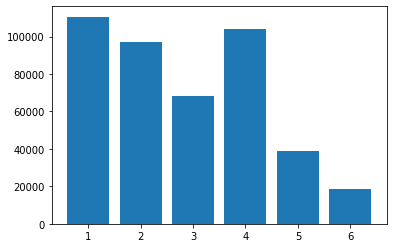

In [12]:
# 1. Отримати для кожної заправки виручену суму за весь час, вказуючи у перелiку номер заправки та її мiсцезнаходження. 
# 2. Побудувати графiк для пункту 1.

station_info = set([x.station_ID for x in stations])

graph = {}
for s in station_info:
    sum = 0
    for p in prices:
        for b in benz:
            if b.station_ID == s and p.benz_type == b.benz_type:
                sum += p.price * b.amount
        for e in electro:
            if e.station_ID == s:
                sum += p.price * (e.end - e.start)
    for i in stations:
        if i.station_ID == s:
            print(f"< Station ID = {s}, Station Location = {i.name} - Total Sum = {sum}")
            graph[i.station_ID] = sum

plt.bar(range(len(graph)), list(graph.values()));
plt.xticks(range(len(graph)), list(graph.keys()));
plt.show()

In [5]:
# 3. Отримати виручену суму усiма заправками (сумарно) селища-мiста, обраного за допомогою вiджету, за задану вiджетом дату.
# 01-01-2020
# 02-02-2020
# 03-03-2020
# 05-05-2020
# 10-10-2020

location = set([x.name for x in stations])
date_info = set([x.date for x in benz])
for x in electro:
    date_info.add(x.date)

def on_text_change(date):
    def on_loc_change(loc):
        for s in stations:
            sum = 0
            if loc == s.name:
                for p in prices:
                    for b in benz:
                        if b.station_ID == s.station_ID and p.benz_type == b.benz_type and b.date == datetime.strptime(date, '%d-%m-%Y'):
                            sum += int(p.price) * int(b.amount)
                    for e in electro:
                        if e.station_ID == s.station_ID and e.date == datetime.strptime(date, '%d-%m-%Y'):
                            sum += p.price * (e.end - e.start)
                print("Station ID = " + str(s.station_ID))
                print("Total money station earned = " + str(sum))
    interact(on_loc_change, loc=location)

interact(on_text_change, date="01-01-2020");

interactive(children=(Text(value='01-01-2020', description='date'), Output()), _dom_classes=('widget-interact'…

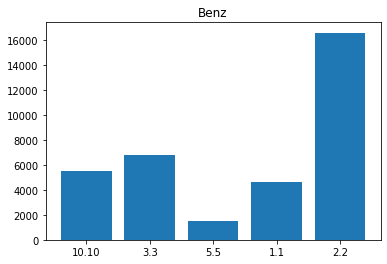

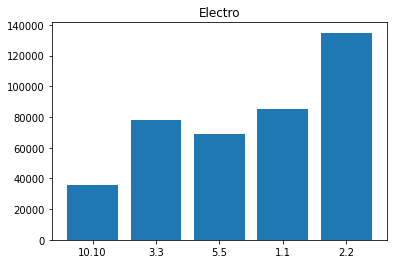

In [6]:
# 4. Побудувати графiки виручки сумарно для усiх паливних i сумарно для усiх електричних заправок щоденно за весь час.
benz_graph = {}
electro_graph = {}
for d in date_info:
    benz_sum = 0
    electro_sum = 0
    for p in prices:
        for b in benz:
            if b.date == d and p.benz_type == b.benz_type:
                benz_sum += p.price * b.amount
        for e in electro:
            if e.date == d:
                electro_sum += p.price * (e.end - e.start)
    for i in stations:
        if i.station_ID == s:
            benz_graph[str(d.day) + "." + str(d.month)] = benz_sum
            electro_graph[str(d.day) + "." + str(d.month)] = electro_sum

plt.title("Benz")
plt.bar(range(len(benz_graph)), list(benz_graph.values()));
plt.xticks(range(len(benz_graph)), list(benz_graph.keys()));
plt.show()

plt.title("Electro")
plt.bar(range(len(electro_graph)), list(electro_graph.values()));
plt.xticks(range(len(electro_graph)), list(electro_graph.keys()));
plt.show()

In [7]:
# 5. Визначити перелiк заправок у кожному селищi-мiстi, якi отримали найбiльшу виручку сумарно за перiод часу, заданий за допомогою вiджетiв.
# 6. Побудувати графiки для п.5.

statio = pd.read_csv("station.csv", names=["station_ID","name"])
pric = pd.read_csv("prices.csv", names=["benz_type", "price"])

ben = pd.read_csv("benz.csv", names=["station_ID", "date", "benz_type", "amount"])
ele = pd.read_csv("electro.csv", names=["station_ID", "date", "start", "end"])

In [8]:
statio

,station_ID,name
0,1,Lviv
1,2,Kiyv
2,3,Odessa
3,4,Dnipro
4,5,Lviv
5,6,Kyiv


In [9]:
pric

,benz_type,price
0,A95,120
1,A92,100
2,Diesel,80
3,Electro,55


In [10]:
ben

,station_ID,date,benz_type,amount
0,1,01-01-2020,A95,20
1,2,02-02-2020,A92,40
2,3,03-03-2020,Diesel,25
3,4,02-02-2020,A95,35
4,1,05-05-2020,A92,15
5,2,10-10-2020,Diesel,20
6,3,01-01-2020,Diesel,15
7,4,02-02-2020,A95,45
8,1,02-02-2020,A92,20
9,2,03-03-2020,Diesel,35


In [11]:
ele

,station_ID,date,start,end
0,1,01-01-2020,100,200
1,2,02-02-2020,120,240
2,3,03-03-2020,80,200
3,4,02-02-2020,150,320
4,1,05-05-2020,95,150
5,2,10-10-2020,80,160
6,3,01-01-2020,140,200
7,4,02-02-2020,160,250
8,1,05-05-2020,90,230
9,2,03-03-2020,75,125
